## Preprocessing

In [13]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import seaborn
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# Read blog and non-blog datasets
df_blog_dataset = pd.read_csv('data/blog-dataset-2k.csv')
df_nonblog_dataset = pd.read_csv('data/nonblog-dataset-1k.csv')

# Concat data frames
data_frames = [df_blog_dataset, df_nonblog_dataset]
df = pd.concat(data_frames)

# Remove url attribıte. (Url attribute is unnecessary for model model Evaluation)
df.drop('url', axis=1, inplace=True)
df = shuffle(df)
df.head()

,isBlog,isWordpress,isBlogSpot,isUrlIncludeDate,isUrlIncludeDomainPostTitle,isUrlIncludeYearMonthPostTitle,isUrlIncludeDomainPostTitleNumbers,urlLen,numOfKeywords,isPrefixBlog,isMetaTagIncludeBlogKeyword,isUrlSuffixHTML,domainLen,pathNumberCount,lenOfPath
873,1,0,0,0,0,0,0,37,72430,0,0,0,10,0,2
136,1,0,0,1,0,0,0,91,44579,0,0,0,23,8,4
765,1,0,0,1,0,0,0,77,39521,0,0,0,14,8,4
280,1,0,0,0,0,0,0,95,6867,0,0,0,25,12,3
576,0,0,0,0,0,0,0,37,18281,0,0,0,21,0,2


## Normalization & Correlation

In [14]:
# data normalization
scaler = MinMaxScaler(feature_range = (0, 1))

df_scaled = scaler.fit_transform(df.to_numpy())

df = pd.DataFrame(df_scaled, columns=df.columns.values)
df.head()

,isBlog,isWordpress,isBlogSpot,isUrlIncludeDate,isUrlIncludeDomainPostTitle,isUrlIncludeYearMonthPostTitle,isUrlIncludeDomainPostTitleNumbers,urlLen,numOfKeywords,isPrefixBlog,isMetaTagIncludeBlogKeyword,isUrlSuffixHTML,domainLen,pathNumberCount,lenOfPath
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084112,0.131966,0.0,0.0,0.0,0.0000,0.000000,0.285714
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.336449,0.081208,0.0,0.0,0.0,0.8125,0.112676,0.571429
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.271028,0.071990,0.0,0.0,0.0,0.2500,0.112676,0.571429
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355140,0.012479,0.0,0.0,0.0,0.9375,0.169014,0.428571
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084112,0.033280,0.0,0.0,0.0,0.6875,0.000000,0.285714


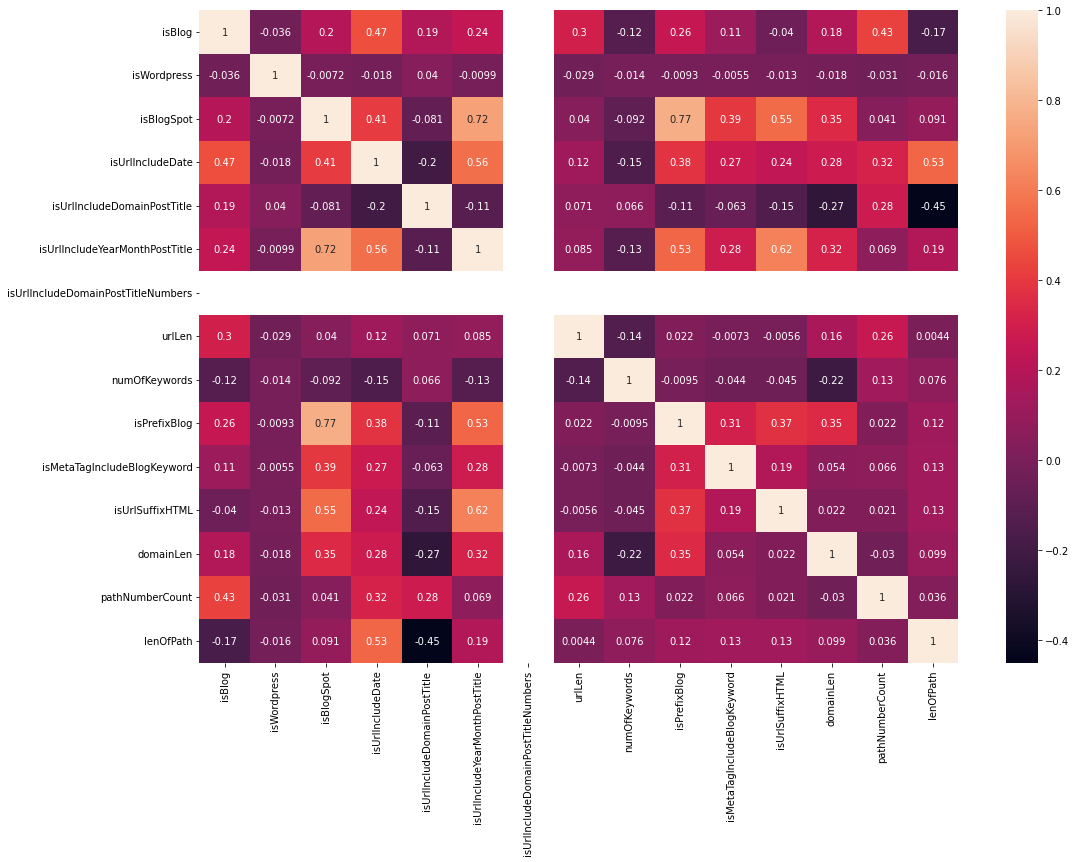

In [15]:
pyplot.figure(figsize=(17,12))
seaborn.heatmap(df.corr(), annot=True)
pyplot.show()

In [16]:
# Heatmap
df.drop('isUrlIncludeDomainPostTitle', axis=1, inplace=True)

## Split Data

In [17]:
X = df.drop("isBlog", axis=1)
y = df["isBlog"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Model Evaluation

### KNeighbors

In [18]:

neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

y_preds = neigh.predict(X_test)
accuracy_score(y_test, y_preds)

0.9928789420142421

### C-Support Vector

In [19]:
svc = SVC()
svc.fit(X_train, y_train)

y_preds = svc.predict(X_test)
accuracy_score(y_test, y_preds)

0.8942014242115972

### Decision Tree

In [20]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)


y_preds = dtree.predict(X_test)
accuracy_score(y_test, y_preds)

0.9796541200406917

###  Gaussian Naive Bayes

In [21]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)


y_preds = gnb.predict(X_test)
accuracy_score(y_test, y_preds)

0.676500508646999